In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [101]:
ds = pd.read_csv("C:/Users/Yuvi/Downloads/datta.csv")
ds

,Date,Open,High,Low,Close,Adj_Close,Volume
0,27-03-00,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,28-03-00,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,29-03-00,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,30-03-00,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,31-03-00,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,01-09-17,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,05-09-17,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,06-09-17,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,07-09-17,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [102]:
#feature engineering
splitted = ds['Date'].str.split('-', expand=True)
 
ds['day'] = splitted[0].astype('int')
ds['month'] = splitted[1].astype('int')
ds['year'] = splitted[2].astype('int')
ds

,Date,Open,High,Low,Close,Adj_Close,Volume,day,month,year
0,27-03-00,3.812500,4.156250,3.812500,4.125000,4.125000,3675600,27,3,0
1,28-03-00,4.125000,4.125000,4.000000,4.015625,4.015625,1077600,28,3,0
2,29-03-00,4.000000,4.031250,3.953125,4.000000,4.000000,437200,29,3,0
3,30-03-00,4.000000,4.000000,3.843750,3.843750,3.843750,1883600,30,3,0
4,31-03-00,3.734375,3.734375,3.390625,3.390625,3.390625,7931600,31,3,0
...,...,...,...,...,...,...,...,...,...,...
4387,01-09-17,113.790001,114.099998,112.790001,113.309998,113.309998,950000,1,9,17
4388,05-09-17,112.519997,113.529999,111.160004,111.870003,111.870003,1805200,5,9,17
4389,06-09-17,112.029999,112.489998,110.250000,112.230003,112.230003,2136700,6,9,17
4390,07-09-17,112.459999,112.900002,112.000000,112.339996,112.339996,1251600,7,9,17


In [103]:
#the feature engineering very much helps in 
#calculating quarter ends which are considered as important times for investors(march, june, september, december)
ds['is_quarter_end'] = np.where(ds['month']%3==0,1,0)
ds

,Date,Open,High,Low,Close,Adj_Close,Volume,day,month,year,is_quarter_end
0,27-03-00,3.812500,4.156250,3.812500,4.125000,4.125000,3675600,27,3,0,1
1,28-03-00,4.125000,4.125000,4.000000,4.015625,4.015625,1077600,28,3,0,1
2,29-03-00,4.000000,4.031250,3.953125,4.000000,4.000000,437200,29,3,0,1
3,30-03-00,4.000000,4.000000,3.843750,3.843750,3.843750,1883600,30,3,0,1
4,31-03-00,3.734375,3.734375,3.390625,3.390625,3.390625,7931600,31,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4387,01-09-17,113.790001,114.099998,112.790001,113.309998,113.309998,950000,1,9,17,1
4388,05-09-17,112.519997,113.529999,111.160004,111.870003,111.870003,1805200,5,9,17,1
4389,06-09-17,112.029999,112.489998,110.250000,112.230003,112.230003,2136700,6,9,17,1
4390,07-09-17,112.459999,112.900002,112.000000,112.339996,112.339996,1251600,7,9,17,1


In [104]:
#we dont need the adj_close and the date columns, so we drop them as:
ds=ds.drop(['Date','Adj_Close'],axis=1)

In [105]:
import random
ix = [(row, col) for row in range(ds.shape[0]) for col in range(ds.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    ds.iat[row, col] = np.nan

In [106]:
ds

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,3.812500,4.156250,3.812500,4.125000,3675600.0,27.0,3.0,0.0,1.0
1,4.125000,4.125000,4.000000,4.015625,1077600.0,NaN,3.0,0.0,1.0
2,4.000000,4.031250,3.953125,4.000000,437200.0,29.0,3.0,0.0,NaN
3,4.000000,4.000000,3.843750,3.843750,1883600.0,30.0,3.0,0.0,1.0
4,NaN,3.734375,3.390625,3.390625,7931600.0,31.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4387,113.790001,NaN,NaN,113.309998,950000.0,1.0,9.0,17.0,1.0
4388,112.519997,113.529999,111.160004,111.870003,1805200.0,5.0,9.0,NaN,1.0
4389,112.029999,112.489998,NaN,112.230003,2136700.0,6.0,9.0,17.0,1.0
4390,112.459999,112.900002,112.000000,112.339996,1251600.0,7.0,9.0,17.0,NaN


In [107]:
ds.describe()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
count,3926.000000,3951.000000,3929.000000,3933.000000,3.981000e+03,3961.000000,3984.000000,3954.000000,3956.000000
mean,30.352058,30.858284,30.526223,30.433369,1.876349e+06,15.805100,6.542922,8.450683,0.332406
std,29.787136,30.273981,29.800372,29.864931,1.629838e+06,8.773116,3.387319,5.031570,0.471135
min,3.296875,3.562500,3.093750,3.250000,1.904000e+05,1.000000,1.000000,0.000000,0.000000
25%,8.712500,8.823750,8.672500,8.642500,1.086400e+06,8.000000,4.000000,4.000000,0.000000
50%,14.676250,15.000000,14.750000,14.690000,1.531700e+06,16.000000,7.000000,8.000000,0.000000
75%,42.298749,42.877500,42.235001,42.500000,2.183200e+06,23.000000,9.000000,13.000000,1.000000
max,121.080002,121.750000,120.169998,121.360001,4.641260e+07,31.000000,12.000000,17.000000,1.000000


In [108]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            3926 non-null   float64
 1   High            3951 non-null   float64
 2   Low             3929 non-null   float64
 3   Close           3933 non-null   float64
 4   Volume          3981 non-null   float64
 5   day             3961 non-null   float64
 6   month           3984 non-null   float64
 7   year            3954 non-null   float64
 8   is_quarter_end  3956 non-null   float64
dtypes: float64(9)
memory usage: 308.9 KB


In [109]:
ds.corr()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
Open,1.000000,0.999906,0.999895,0.999801,0.061732,-0.005428,-0.008600,0.865361,0.000078
High,0.999906,1.000000,0.999875,0.999916,0.049364,0.001141,-0.020559,0.865807,-0.004070
Low,0.999895,0.999875,1.000000,0.999909,0.049193,0.000290,-0.013935,0.867118,-0.002237
Close,0.999801,0.999916,0.999909,1.000000,0.056490,-0.004453,-0.010560,0.867134,-0.000883
Volume,0.061732,0.049364,0.049193,0.056490,1.000000,0.016971,-0.052444,0.132260,-0.054385
day,-0.005428,0.001141,0.000290,-0.004453,0.016971,1.000000,0.001482,-0.014892,0.006987
month,-0.008600,-0.020559,-0.013935,-0.010560,-0.052444,0.001482,1.000000,-0.062914,0.176690
year,0.865361,0.865807,0.867118,0.867134,0.132260,-0.014892,-0.062914,1.000000,0.000784
is_quarter_end,0.000078,-0.004070,-0.002237,-0.000883,-0.054385,0.006987,0.176690,0.000784,1.000000


###### splitting dependent and independent values

In [110]:
#dependent values
dep=ds.iloc[:,:-4].values
dep

array([[3.81250000e+00, 4.15625000e+00, 3.81250000e+00, 4.12500000e+00,
        3.67560000e+06],
       [4.12500000e+00, 4.12500000e+00, 4.00000000e+00, 4.01562500e+00,
        1.07760000e+06],
       [4.00000000e+00, 4.03125000e+00, 3.95312500e+00, 4.00000000e+00,
        4.37200000e+05],
       ...,
       [1.12029999e+02, 1.12489998e+02,            nan, 1.12230003e+02,
        2.13670000e+06],
       [1.12459999e+02, 1.12900002e+02, 1.12000000e+02, 1.12339996e+02,
        1.25160000e+06],
       [1.12300003e+02, 1.14790001e+02, 1.12010002e+02,            nan,
        1.61170000e+06]])

In [111]:
indep=ds.iloc[:,-1].values
indep

array([ 1.,  1., nan, ...,  1., nan,  1.])

###### handling missing data

In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dep)

In [113]:
ds.isnull().sum()

Open              466
High              441
Low               463
Close             459
Volume            411
day               431
month             408
year              438
is_quarter_end    436
dtype: int64

In [114]:
dep_train, dep_test, indep_train, indep_test = train_test_split(dep, indep, test_size=0.2, random_state=0)

In [115]:
from sklearn.preprocessing import StandardScaler
sc_dep = StandardScaler()
dep_train = sc_dep.fit_transform(dep_train)
dep_train = sc_dep.transform(dep_test)
dep_train

array([[ 2.56227023,         nan,         nan,         nan,         nan],
       [-0.664607  , -0.66625737, -0.67088141, -0.6650553 , -0.41801682],
       [-0.79752876, -0.7992403 ,         nan, -0.79919613, -0.6287508 ],
       ...,
       [ 0.63842904,  0.62900295,  0.62546118,  0.63946422, -0.25490189],
       [-0.17420625, -0.16740603, -0.18002182,         nan, -0.25648042],
       [        nan,         nan,  2.1004736 ,  2.12239111, -0.58968214]])

In [116]:
forecast =10
ds['fc']=ds['Open'].shift(-forecast)
print(ds.head())
x =np.array(ds.drop(['fc'],1))
y = np.array(ds['fc'])
x =preprocessing.scale(x)
#print(x)
#print(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=4)
print(len(x_train))
print(len(x_test))


     Open      High       Low     Close     Volume   day  month  year  \
0  3.8125  4.156250  3.812500  4.125000  3675600.0  27.0    3.0   0.0   
1  4.1250  4.125000  4.000000  4.015625  1077600.0   NaN    3.0   0.0   
2  4.0000  4.031250  3.953125  4.000000   437200.0  29.0    3.0   0.0   
3  4.0000  4.000000  3.843750  3.843750  1883600.0  30.0    3.0   0.0   
4     NaN  3.734375  3.390625  3.390625  7931600.0  31.0    3.0   0.0   

   is_quarter_end        fc  
0             1.0  3.687500  
1             1.0  3.578125  
2             NaN  3.546875  
3             1.0  3.578125  
4             1.0       NaN  
3733
659


C:\Users\Yuvi\AppData\Local\Temp\ipykernel_21276\62011786.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x =np.array(ds.drop(['fc'],1))


C:\Users\Yuvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yuvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yuvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

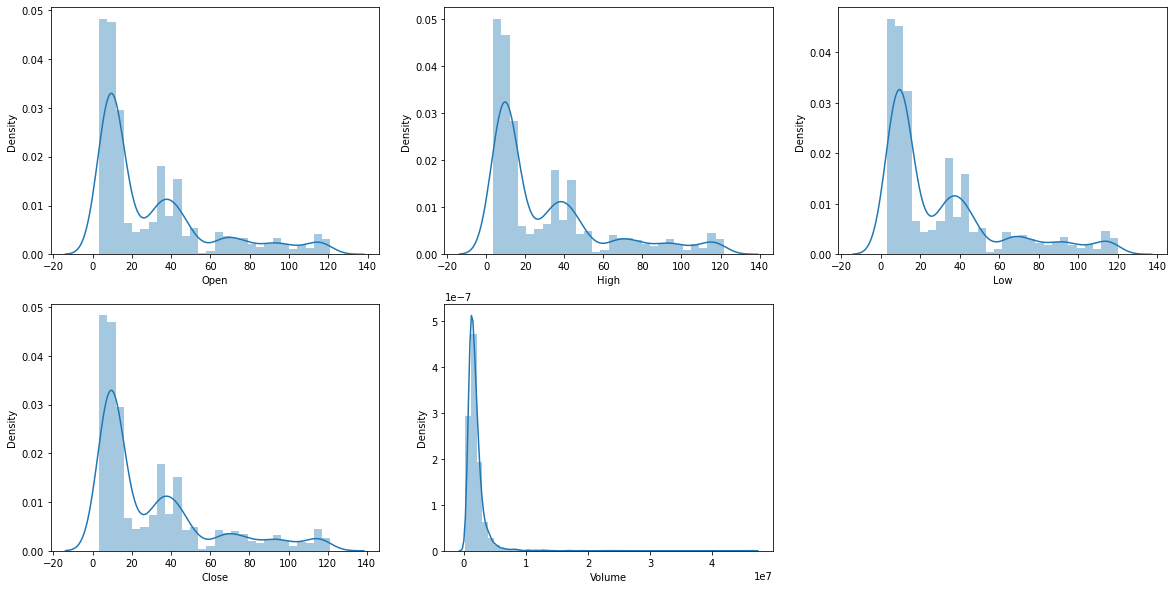

In [117]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(ds[col])
plt.show()